# Random forest Fraud check

<h3> Import all the required libraries </h3>

In [1]:
#importing all required lib'rs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold,train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder

# EDA

In [67]:
#reading the csv file
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [3]:
df.shape

(600, 7)

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
fraud_status       0
dtype: int64

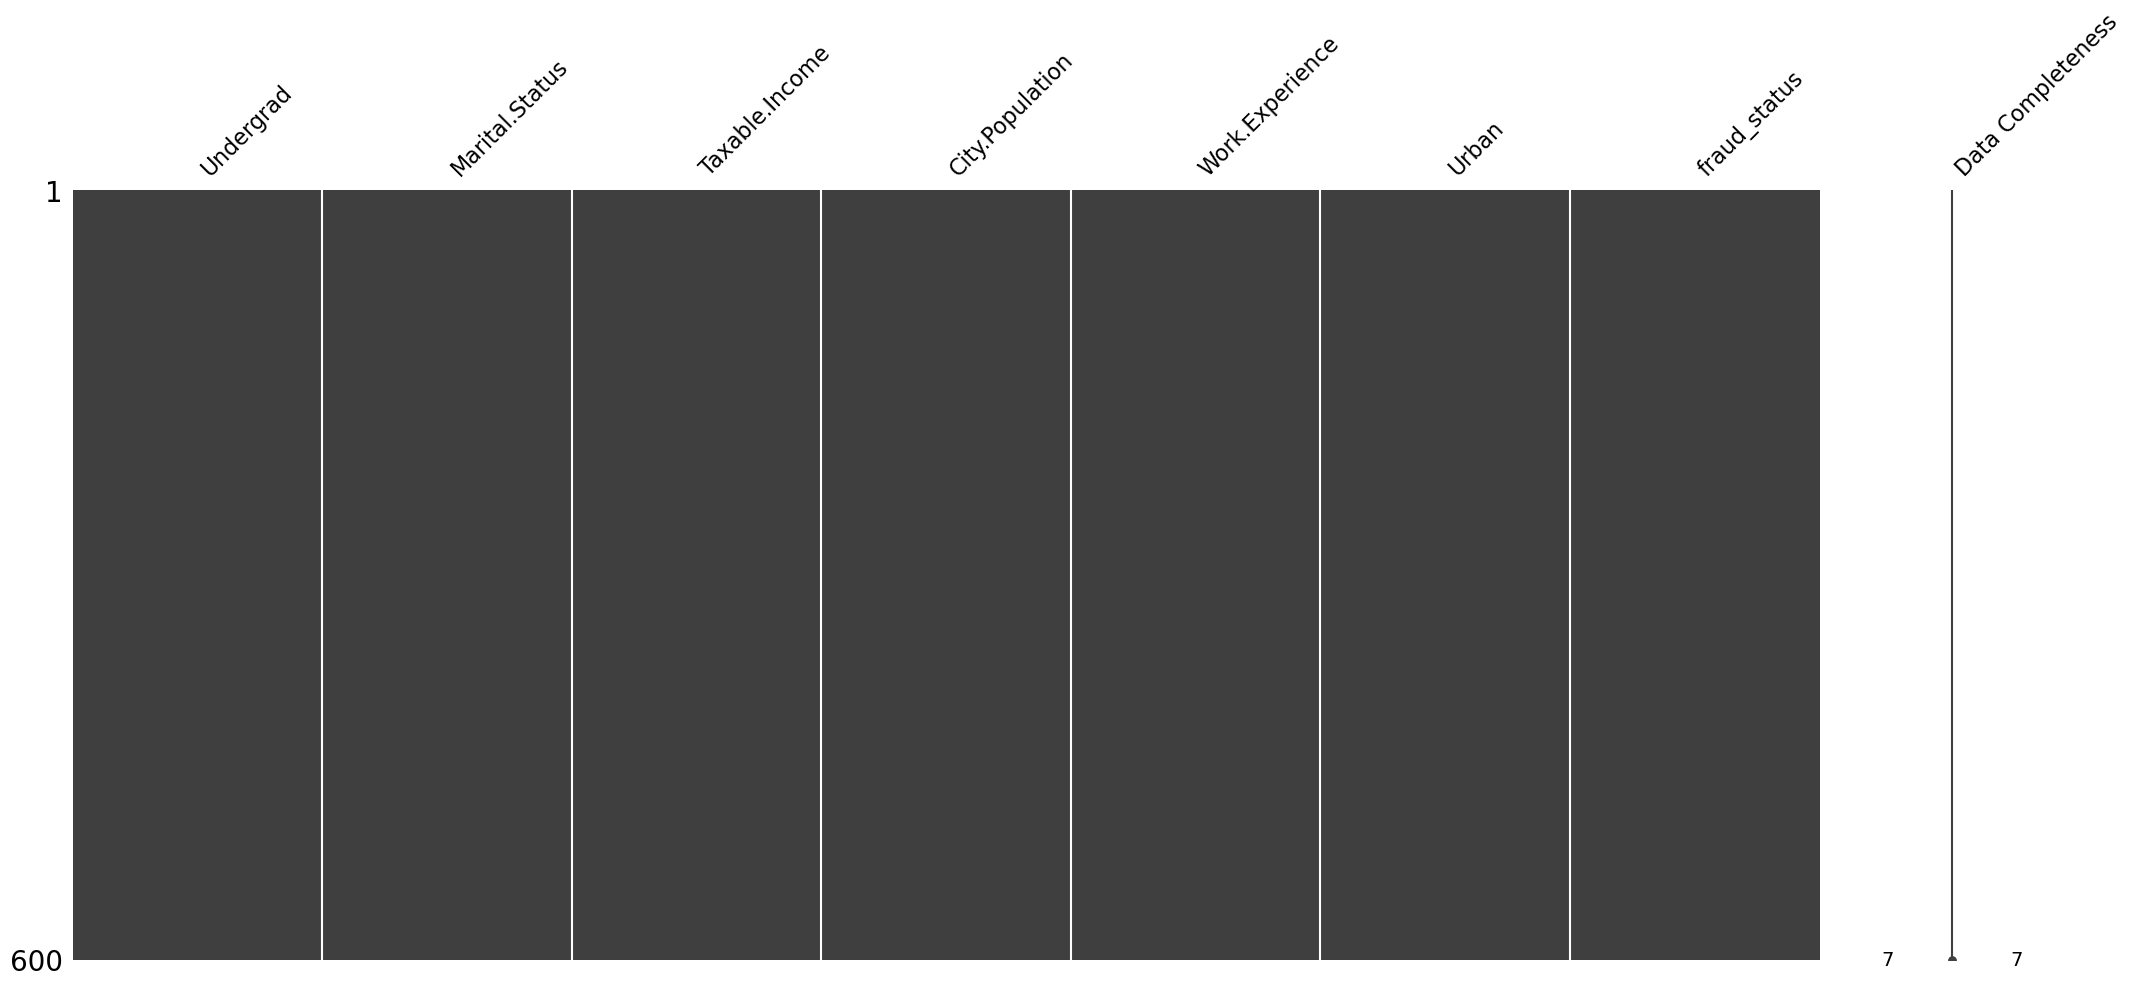

In [4]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [5]:
#different datatypes in dataframe
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
fraud_status       object
dtype: object

In [68]:
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
#i am creating the new column based on the above given condition

df['taxable_income']='Good'
df.loc[df['Taxable.Income']<=30000,'taxable_income']='Risky'
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status,taxable_income
0,NO,Single,68833,50047,10,YES,good,Good
1,YES,Divorced,33700,134075,18,YES,good,Good
2,NO,Married,36925,160205,30,YES,good,Good
3,YES,Single,50190,193264,15,YES,good,Good
4,NO,Married,81002,27533,28,NO,good,Good


In [69]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
fraud_status       object
taxable_income     object
dtype: object

In [70]:
#i am droping the taxable.income column
df=df.drop('Taxable.Income',axis=1)

In [71]:
#encoding all the requried data for classification

df['Undergrad']=LabelEncoder().fit_transform(df['Undergrad'])
df['Urban']=LabelEncoder().fit_transform(df['Urban'])
df['taxable_income']=LabelEncoder().fit_transform(df['taxable_income'])
df['Marital.Status']=LabelEncoder().fit_transform(df['Marital.Status'])


df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,fraud_status,taxable_income
0,0,2,50047,10,1,good,0
1,1,0,134075,18,1,good,0
2,0,1,160205,30,1,good,0
3,1,2,193264,15,1,good,0
4,0,1,27533,28,0,good,0


In [11]:
#checking whether it contains any  null values and checking datatypes of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int32 
 1   Marital.Status   600 non-null    int32 
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    int32 
 5   fraud_status     600 non-null    object
 6   taxable_income   600 non-null    int32 
dtypes: int32(4), int64(2), object(1)
memory usage: 23.6+ KB


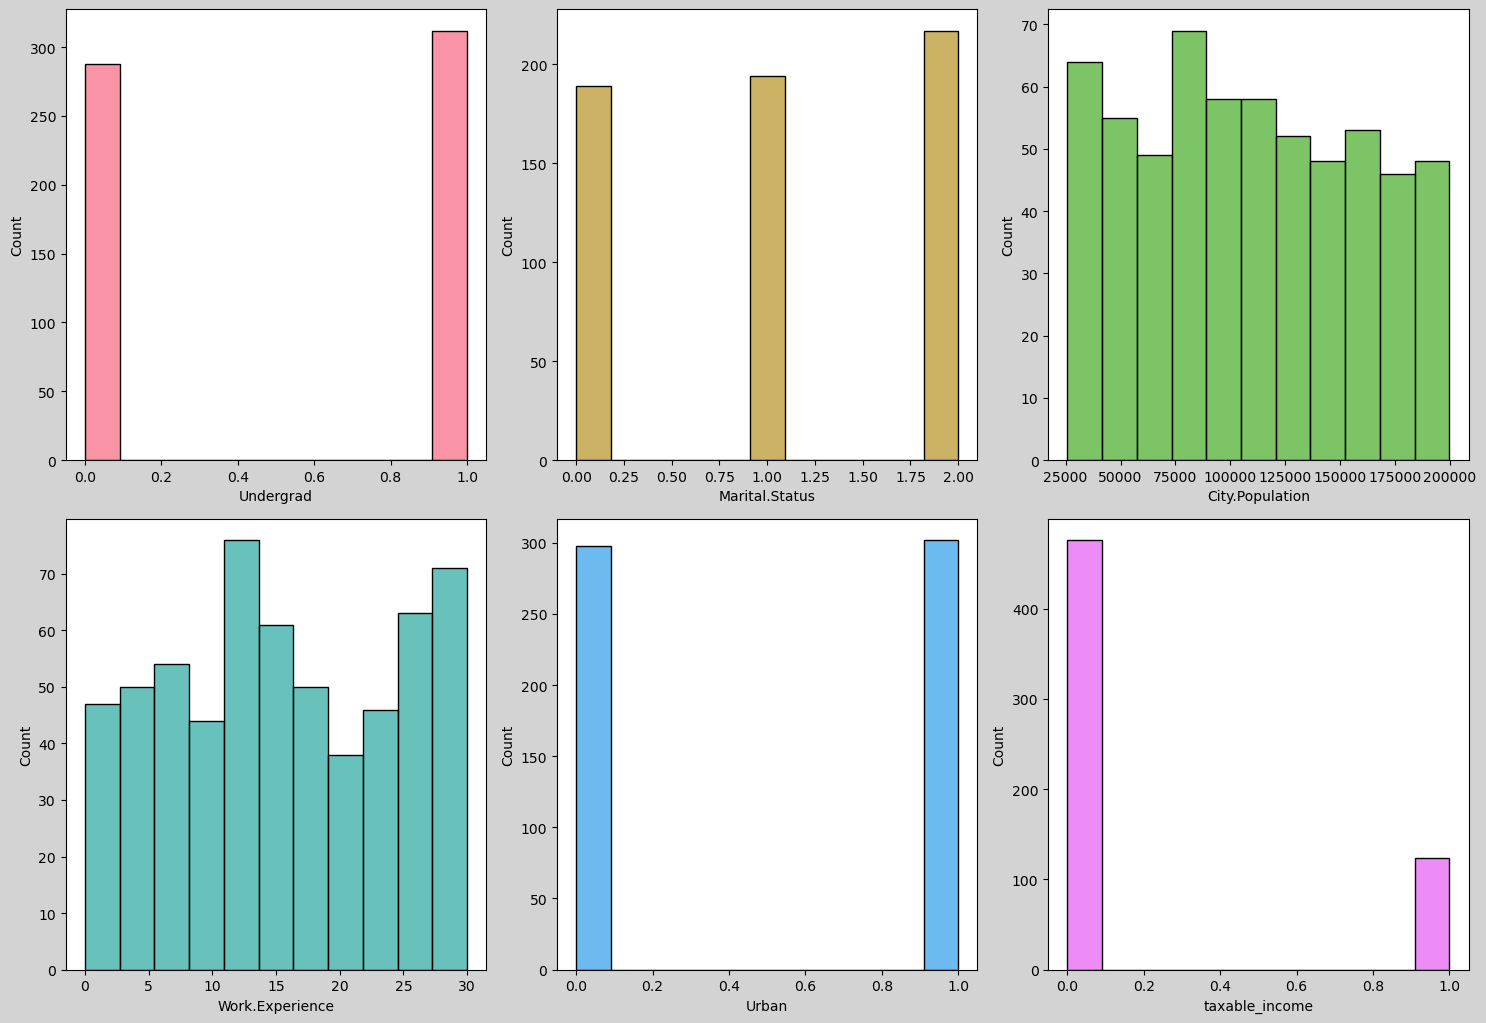

In [12]:
import matplotlib.pyplot as plt
c=3
r=3
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

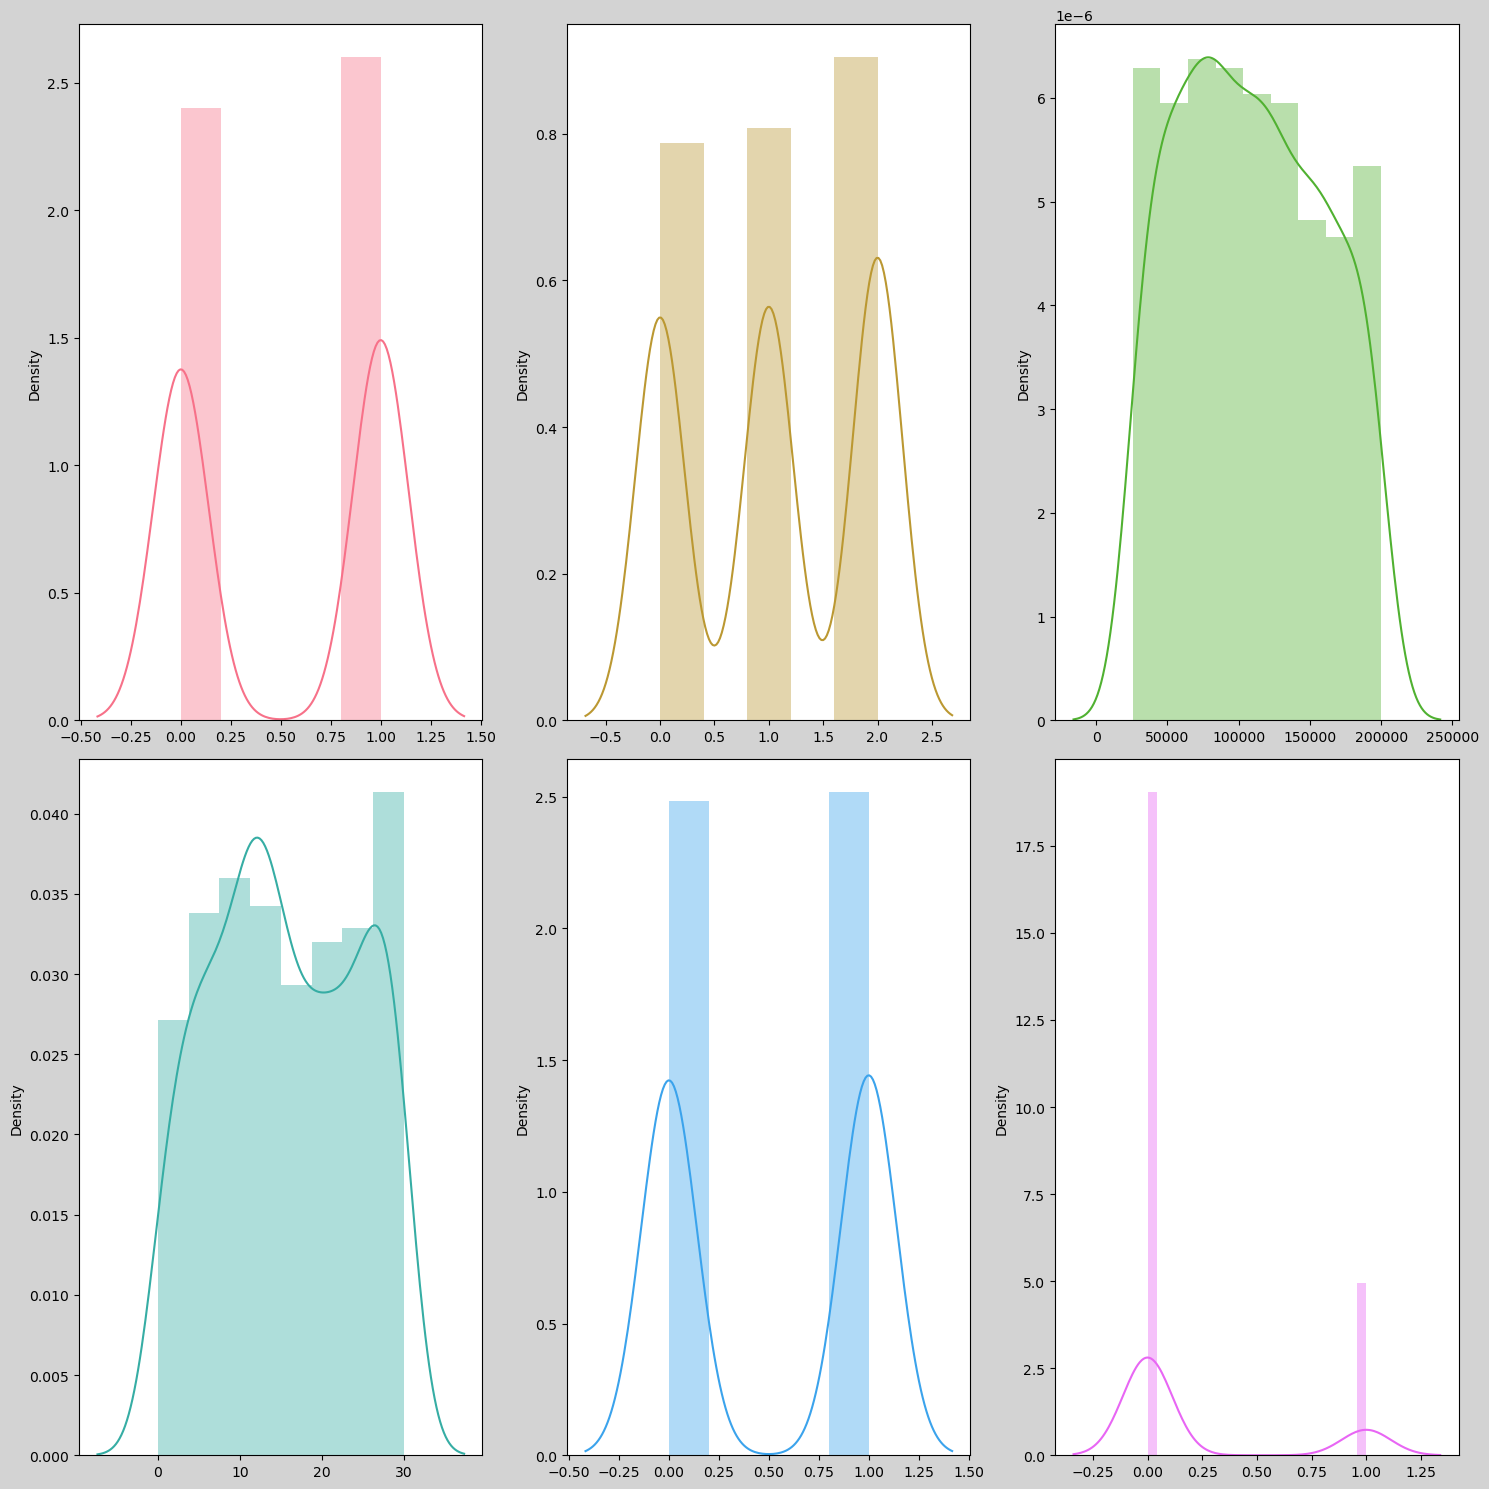

In [13]:
#performing univerent analysis
import warnings
warnings.filterwarnings('ignore')
c=3
r=2
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

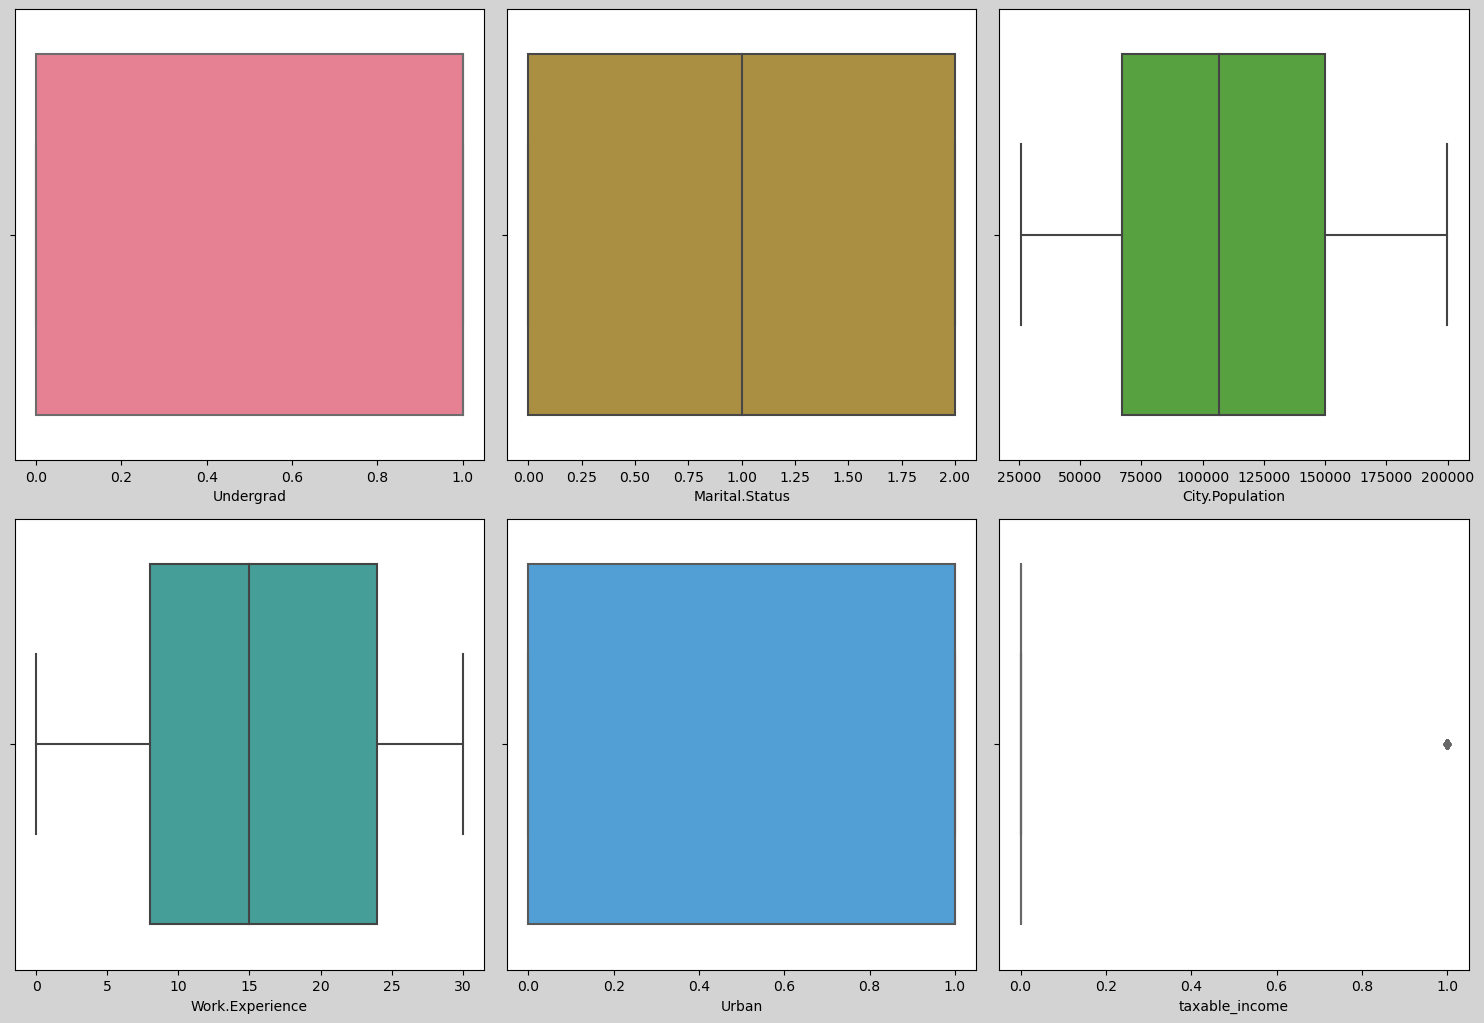

In [14]:
#performing univerent analysis
c=3
r=3
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
taxable_income,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


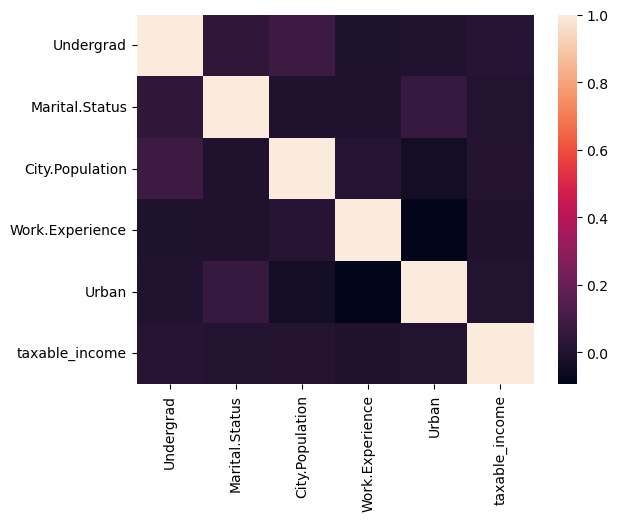

In [15]:
sns.heatmap(df.corr())
df.corr()

In [72]:
df=df.drop('fraud_status',axis=1)

In [100]:
#data scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler().fit_transform(df.iloc[:,:-1])
variables=scale
target=df.iloc[:,-1]


In [101]:
#spliting data as train and test
X_train, X_test, y_train, y_test = train_test_split(variables,target,test_size=0.3)

In [102]:
#building the model
model=RandomForestClassifier(n_estimators=100,max_features=2).fit(X_train,y_train)
print('test accuracy of the model',accuracy_score(y_test,model.predict(X_test)))

test accuracy of the model 0.6944444444444444


In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       134
           1       0.15      0.04      0.07        46

    accuracy                           0.69       180
   macro avg       0.45      0.48      0.44       180
weighted avg       0.59      0.69      0.63       180



<AxesSubplot:>

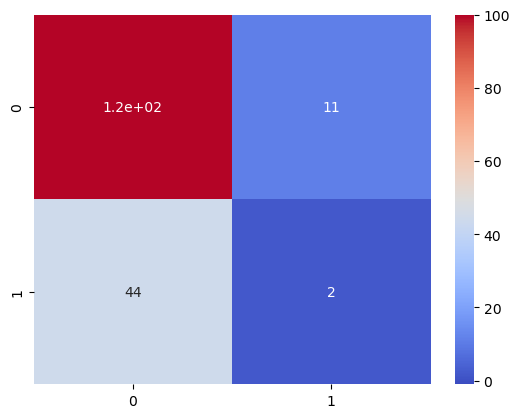

In [104]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), vmin = -1, vmax = +100, annot = True, cmap = 'coolwarm')

# SMOTEENN

In [105]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

X_resampled.shape,y_resampled.shape

print(f'size of 0th class  {len(y_resampled[y_resampled==0])}')
print(f'size of 1st class  {len(y_resampled[y_resampled==1])}')

size of 0th class  170
size of 1st class  181


In [106]:
#building the model
model=RandomForestClassifier(n_estimators=100,max_features=2).fit(X_resampled, y_resampled)
print('test accuracy of the model',accuracy_score(y_test,model.predict(X_test)))

test accuracy of the model 0.5666666666666667


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       134
           1       0.19      0.22      0.20        46

    accuracy                           0.57       180
   macro avg       0.46      0.45      0.45       180
weighted avg       0.58      0.57      0.57       180



<AxesSubplot:>

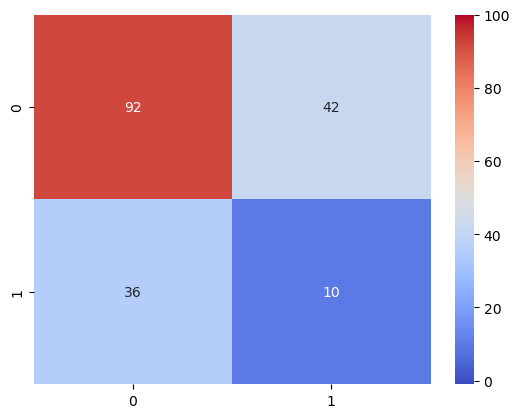

In [108]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), vmin = -1, vmax = +100, annot = True, cmap = 'coolwarm')

# ADASYN

In [109]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train.ravel())

X_resampled.shape, y_resampled.shape

print(f'size of 0th class  {len(y_resampled[y_resampled==0])}')
print(f'size of 1st class  {len(y_resampled[y_resampled==1])}')

size of 0th class  342
size of 1st class  335


In [110]:
#building the model
model=RandomForestClassifier(n_estimators=100,max_features=2).fit(X_resampled, y_resampled)
print('test accuracy of the model',accuracy_score(y_test,model.predict(X_test)))

test accuracy of the model 0.5888888888888889


In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       134
           1       0.22      0.24      0.23        46

    accuracy                           0.59       180
   macro avg       0.48      0.47      0.47       180
weighted avg       0.60      0.59      0.59       180



<AxesSubplot:>

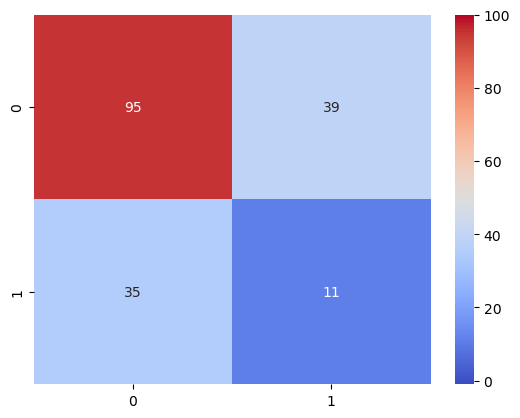

In [112]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), vmin = -1, vmax = +100, annot = True, cmap = 'coolwarm')

# over Sampling using SMOTE 

In [113]:
#data balancing should be done because data's are not distributed properly
#let me use oversampling techniques
from imblearn.over_sampling import SMOTE


# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display new class distribution
pd.Series(y_resampled).value_counts()

0    342
1    342
Name: taxable_income, dtype: int64

In [114]:
#building the model
model=RandomForestClassifier(n_estimators=100,max_features=2).fit(X_resampled, y_resampled)
print('test accuracy of the model',accuracy_score(y_test,model.predict(X_test)))

test accuracy of the model 0.6055555555555555


In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       134
           1       0.21      0.20      0.20        46

    accuracy                           0.61       180
   macro avg       0.47      0.47      0.47       180
weighted avg       0.60      0.61      0.60       180



<AxesSubplot:>

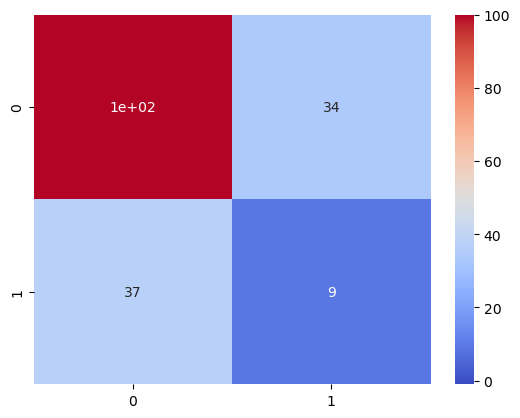

In [116]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), vmin = -1, vmax = +100, annot = True, cmap = 'coolwarm')